In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import pandas as pd
from collections import Counter

In [23]:
origin = pd.read_csv('../totalWrong.csv')
jy = pd.read_csv('./totalJiyoung.csv')

In [24]:
model_name = 'klue/bert-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [6]:
jy.target.value_counts().reindex(range(7))

target
0    136
1    187
2    337
3    129
4    112
5     42
6    101
Name: count, dtype: int64

In [7]:
origin.target.value_counts().reindex(range(7))

target
0    134
1    204
2    339
3    137
4    114
5     54
6    117
Name: count, dtype: int64

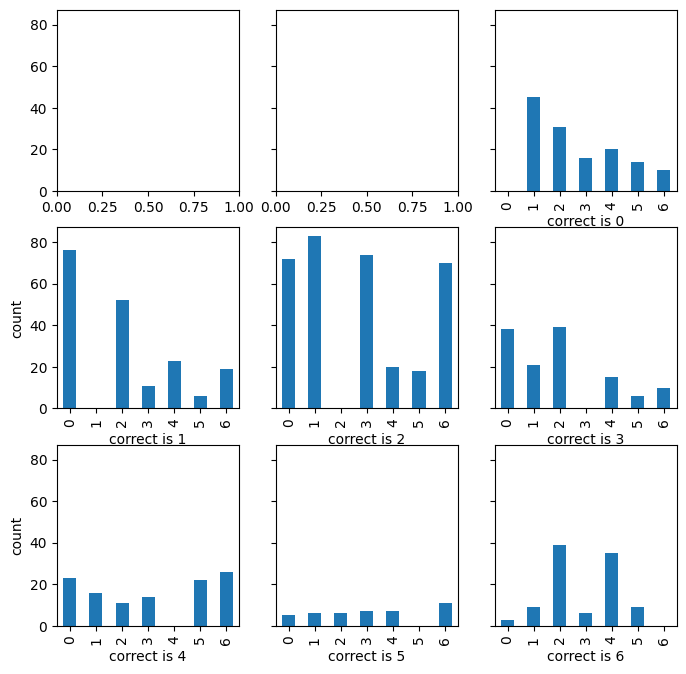

In [12]:
fig, axes =plt.subplots(3,3,figsize=(8,8),sharey=True)
axes =axes.flatten()
# origin[origin.target != origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

# jy[jy.target != jy.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    jy[(jy.target != jy.pred_target) & (jy.target==i) ].pred_target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'correct is {i}',ylabel='count')


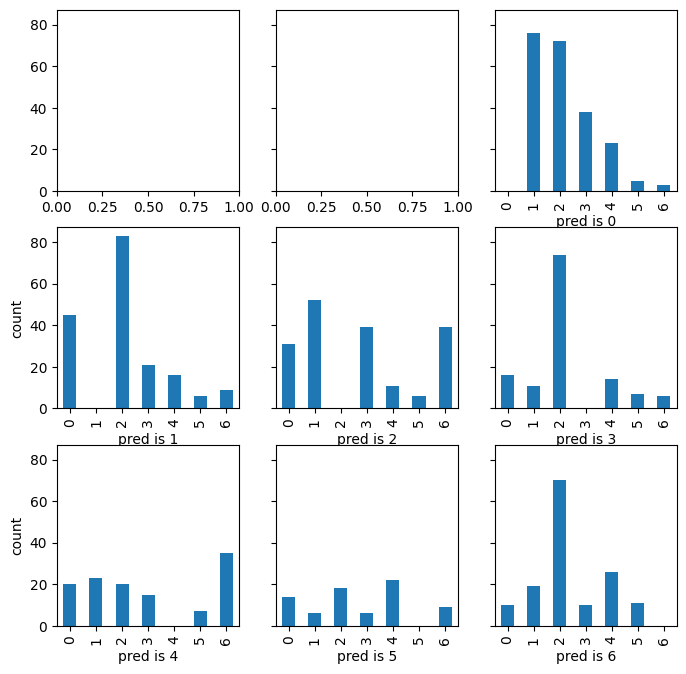

In [17]:
fig, axes =plt.subplots(3,3,figsize=(8,8),sharey=True)
axes =axes.flatten()
# origin[origin.target != origin.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[0],ylabel='count')

# jy[jy.target != jy.pred_target].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[1],ylabel='count')
for i in range(7):
    jy[(jy.target != jy.pred_target) & (jy.pred_target==i) ].target.value_counts().reindex(range(7)).plot(kind='bar',ax=axes[i+2],xlabel=f'pred is {i}',ylabel='count')


In [21]:
jy[(jy.target==2) & (jy.pred_target.isin([0,1,3,6])) ]

,ID,text,target,url,date,pred_target
7,ynat-v1_train_00152,실수로 증권사 파산까지…증시 강타한 팻핑거 역사,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.08. 오후 2:49,1
18,ynat-v1_train_00492,국민 10명 중 8명 혁신 기술로 일자리 줄어들 것,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.04.05. 오전 10:58,0
20,ynat-v1_train_00508,남원 원천천에 2020년까지 수변 생태레저공원 조성,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.01.06. 오후 5:21,3
24,ynat-v1_train_00568,내년 사회적금융 2400억원 공급…사회가치연대기금도 설립,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.12.12. 오전 10:52,1
27,ynat-v1_train_00656,무주택자 8월2일 전 계약금 냈으면 2년 거주 적용 안 해,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.12. 오전 10:00,1
...,...,...,...,...,...,...
1026,ynat-v1_train_06427,광주세계수영대회 조직위 문화행사 시민 공연예술가 모집,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.03.21. 오후 4:18,3
1031,ynat-v1_train_06583,거리두기 단계 격상하나…정부 29일 일요일 중대본서 최종결정,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2020.11.27. 오후 12:05,6
1033,ynat-v1_train_06623,죽을기를 각오 黃 단식 첫날 靑 불허에 부랴부랴 농성장 변경종합,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.11.20. 오후 7:00,6
1034,ynat-v1_train_06639,카카오 잡플래닛과 손잡고 생생한 채용정보 제공,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.08.24. 오전 9:23,0


In [40]:
# 조건에 맞는 텍스트 선택
texts = jy[(jy.target==2) & (jy.pred_target.isin([0,1,3,6]))].text

# 각 텍스트를 토큰화
tokens = [token for text in texts for token in tokenizer.tokenize(text)]
Counter(tokens).most_common()


[('…', 105),
 ('##에', 61),
 ('·', 50),
 ('##는', 38),
 ('##년', 24),
 ('##만', 23),
 ('##도', 22),
 ('##의', 22),
 ('##대', 21),
 ('##로', 20),
 ('##한', 19),
 ('##원', 19),
 ('##지', 18),
 ('##다', 18),
 ('##일', 17),
 ('##종합', 17),
 ('##상', 17),
 ('##기', 16),
 ('##하', 16),
 ('##명', 15),
 ('##회', 15),
 ('##고', 15),
 ('##전', 14),
 ('##서', 14),
 ('##가', 13),
 ('##자', 13),
 ('##사', 13),
 ('##억', 12),
 ('2', 12),
 ('##인', 12),
 ('##개', 12),
 ('##장', 11),
 ('5', 11),
 ('##이', 11),
 ('##화', 11),
 ('1', 11),
 ('##천', 10),
 ('##위', 10),
 ('##보', 10),
 ('##은', 10),
 ('한국', 10),
 ('지원', 10),
 ('10', 9),
 ('##적', 9),
 ('##관', 9),
 ('##주', 9),
 ('네이버', 9),
 ('##으로', 9),
 ('##과', 9),
 ('##유', 9),
 ('##까', 8),
 ('##월', 8),
 ('대통령', 8),
 ('7', 8),
 ('%', 8),
 ('##수', 8),
 ('##을', 8),
 ('##심', 8),
 ('게시판', 8),
 ('##들', 8),
 ('##정', 8),
 ('##발', 7),
 ('##제', 7),
 ('##성', 7),
 ('과학', 7),
 ('##어', 7),
 ('[UNK]', 7),
 ('##여', 7),
 ('수사', 7),
 ('##간', 7),
 ('##와', 7),
 ('##게', 7),
 ('##포', 7),
 ('##소', 7),
 ('전', 6),

In [44]:
jy[(jy.target==2) & (jy.pred_target.isin([0,1,3,6]))].to_csv('../sample.csv',index=False)

In [38]:
jy_origin = pd.read_csv('../data/train_p2g.csv')

In [43]:
texts = jy_origin.text
tokens = [token for text in texts for token in tokenizer.tokenize(text)]
Counter(tokens).most_common()


[('…', 3116),
 ('##에', 1273),
 ('·', 1135),
 ('##는', 777),
 ('##의', 648),
 ('##종합', 590),
 ('##서', 521),
 ('##도', 486),
 ('1', 462),
 ('##원', 448),
 ('##로', 447),
 ('##다', 443),
 ('##기', 431),
 ('##은', 413),
 ('##만', 366),
 ('##대', 364),
 ('##일', 358),
 ('##한', 354),
 ('##년', 351),
 ('2', 350),
 ('3', 337),
 ('##고', 333),
 ('##보', 329),
 ('##이', 319),
 ('5', 303),
 ('##명', 299),
 ('##가', 289),
 ('##지', 288),
 ('##하', 281),
 ('##전', 277),
 ('##주', 270),
 ('%', 267),
 ('##회', 266),
 ('##위', 261),
 ('##억', 253),
 ('##장', 246),
 ('대통령', 233),
 ('##상', 230),
 ('##인', 229),
 ('##화', 229),
 ('##자', 219),
 ('美', 218),
 ('##들', 216),
 ('4', 216),
 ('##과', 215),
 ('한국', 210),
 ('##으로', 208),
 ('北', 203),
 ('##구', 202),
 ('##월', 199),
 ('##사', 198),
 ('.', 195),
 ('##시', 187),
 ('##개', 181),
 ('##천', 178),
 ('첫', 176),
 ('##수', 172),
 ('##성', 171),
 ('##적', 166),
 ('[UNK]', 166),
 ('##정', 166),
 ('##까', 163),
 ('##제', 162),
 ('LG', 161),
 ('##2', 158),
 ('##당', 158),
 ('##분', 158),
 ('##G', 149),

In [54]:
jy[jy.ID.isin(origin.ID)].target.value_counts().reindex(range(7))

target
0    109
1    176
2    310
3    116
4    101
5     39
6     97
Name: count, dtype: int64

In [56]:
jy[~jy.ID.isin(origin.ID)].target.value_counts().reindex(range(7))


target
0    27
1    11
2    27
3    13
4    11
5     3
6     4
Name: count, dtype: int64